# Synthetic expression data from asynchronous random walks on star network

In this series of notebooks, we demonstrate how scBoolSeq can be employed to generate synthetic scRNA-Seq datasets from Boolean states of trajectories of mechanistic Boolean models.

This notebook focuses on a toy model where a transcription factor progressively activates its target genes.

In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
import numpy as np
import random
from colomoto.minibn import * # for Boolean network manipulation
from scboolseq import scBoolSeq

# set seed for reproducible results
_rng_seed = 19834650
# use a Generator instead of numpy's singleton
_rng = np.random.default_rng(_rng_seed)
random.seed(_rng_seed)

## Load Boolean network model

In [3]:
bn = BooleanNetwork.load("models/star.bnet")
bn

gene1 <- tf
gene10 <- tf
gene2 <- tf
gene3 <- tf
gene4 <- tf
gene5 <- tf
gene6 <- tf
gene7 <- tf
gene8 <- tf
gene9 <- tf
tf <- 1

# computing graph layout...


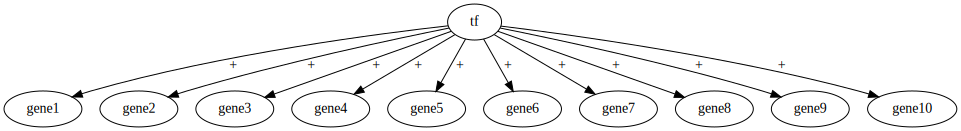

In [4]:
bn.influence_graph()

## Simulation with random walk

With the asynchronous update mode, the activation of the genes can be made in any order. Here, we randomly sample one trajectory of this model, which essentially boils down to selecting a random ordering of genes that get activated.

Let us first specify the initial state of the network:

In [5]:
initial_state = bn.zero()
initial_state["tf"] = 1
initial_state

{'tf': 1,
 'gene1': 0,
 'gene2': 0,
 'gene3': 0,
 'gene4': 0,
 'gene5': 0,
 'gene6': 0,
 'gene7': 0,
 'gene8': 0,
 'gene9': 0,
 'gene10': 0}

Then, we use `minibn` to generate a random walk in the asynchronous dynamics of the Boolean network from the given initial state:

In [6]:
dynamics = FullyAsynchronousDynamics(bn)
random_walk_df = pd.DataFrame(dynamics.random_walk(initial_state, steps=10))
random_walk_df

,tf,gene1,gene2,gene3,gene4,gene5,gene6,gene7,gene8,gene9,gene10
0,1,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,1,0,0
2,1,1,0,0,0,0,0,0,1,0,0
3,1,1,0,1,0,0,0,0,1,0,0
4,1,1,0,1,0,0,1,0,1,0,0
5,1,1,0,1,0,0,1,0,1,1,0
6,1,1,0,1,0,0,1,0,1,1,1
7,1,1,0,1,1,0,1,0,1,1,1
8,1,1,1,1,1,0,1,0,1,1,1
9,1,1,1,1,1,0,1,1,1,1,1


## Retrieve reference dataset

In [7]:
%ls data_filtered_vargenes/*csv

data_filtered_vargenes/GSE122466_Retina.csv
data_filtered_vargenes/GSE122466_Retina_vargenes_batch1.csv
data_filtered_vargenes/GSE130973_human_skin.csv
data_filtered_vargenes/GSE156234_Macrophages.csv
data_filtered_vargenes/GSE60361_mouse_brain.csv
data_filtered_vargenes/GSE81682_Hematopoiesis.csv


In [8]:
ref_data = pd.read_csv("data_filtered_vargenes/GSE81682_Hematopoiesis.csv", index_col=0)
ref_data.head()

,8430408G22Rik,Plp1,Zfp947,Bhlhb9,Vps35,Slc18a1,Fam107b,Gm14230,Plekhn1,Ankrd6,9030619P08Rik,Prtn3,Lrrn4,Mrgpre,Gm25926,Plppr3,Memo1,Cdkn1c,Gm2a,Phxr4,B2m,Tbxas1,Glipr2,Tcf15,Trim58,D930028M14Rik,1700010I14Rik,Gm10384,Sla2,Trp53i13,Gm17586,Gypc,Clic5,Tubb4b,AC149090.1,Gm26580,Clec1a,Ccl9,Gimap3,Zscan18,Spi1,Ccl6,2900041M22Rik,Klk8,Gm37637,Gp9,Idh3a,Akr1c13,2810408A11Rik,Npr2,Ephx1,Pik3ip1,ENSMUSG00000043858,Gm26789,Grina,Txnip,Gm26541,Dnajb3,Msn,Gm37124,Srd5a1,Bhlhe40,Pomgnt2,Fcer1g,Gm37298,Lmo1,Rab20,Cd69,Gm2788,Gm14276,Napa,Cd24a,Nsun2,Marveld2,Ms4a4b,Gm17590,Cdk6,Tada2b,Gm5113,Mki67,Btg2,Gnat2,Tcaf1,Slc35e4,Reep2,8430419K02Rik,Pdgfd,H2-K1,Sesn1,Bcap29,Gm21814,Eif5a,Stk25,Maged1,Zfp449,9130604C24Rik,6430590A07Rik,Tcirg1,Il4,Slc35a4,Cysltr2,Ap3m2,Dsel,Cmtm7,Arl8b,Gbx2,Smim10l2a,Cyth4,S1pr4,Gdi1,Hdhd3,Vill,Slc38a6,Calu,Gm16565,Smim3,Sar1a,4833407H14Rik,B230217O12Rik,Ccdc39,Spata2l,Arxes2,Dut,Ifngr1,Rasa3,Fbxl2,Pde4b,Ptp4a3,Cdt1,Fxyd1,Arl11,Shisa8,Dleu7,Tmem173,Atxn10,Rpn2,Ccl3,Nudt16,Kif3c,Hars,Ccl4,Myo1g,Cpq,Cox6a2,Sdc3,Dok2,Fcgrt,Elmo1,Cyc1,Calr,Gpr18,Tbxa2r,Gpr183,Naaa,Gm11110,Alad,Taz,Echdc3,Cd300a,Slc39a4,Zfp128,Gm26819,Ispd,Itm2b,Zfp647,Gm16861,Nek3,Gata2,Prss16,Lppos,Lhcgr,Fundc1,Lat,Tnfrsf26,Prr36,Vldlr,Mfge8,Enkur,Rcor2,Ndn,Btla,Zyx,Cd33,Dkc1,Rab37,Cdcp1,Hoxa9,Oat,Vegfc,Gas6,Oasl2,Tacc1,Colgalt1,Xdh,Rab32,Dusp2,Tmem176a,Gnai3,Rnf13,Elane,Cd48,Mthfd1,Igkc,Fnta,Bok,Ripply3,Ptger2,P2rx7,Wdfy2,Eif1a,Gstm7,Tmem14c,2900018N21Rik,Mpl,Sash3,Tgm2,Gm19569,Ehd3,Cish,Calml4,Mesdc2,Nfil3,Tcn2,Saraf,Meis1,Serpina3g,Pcx,Gpr171,Cks1b,Coa5,Arhgap27os3,Farsa,Ctsl,Iigp1,P2ry14,Cd82,Slc18a2,Cd302,Parp12,Isyna1,S100a8,B130034C11Rik,Arhgap27,Klf1,Gm26740,Cd84,Bag2,Tmem123,Emilin1,4930568A12Rik,Clec11a,Mat2a,Tespa1,Wfdc17,Tspan13,Dyrk2,S100a9,F10,Pde1b,Gcnt2,Ppic,Zfp72,Gm4841,Ckb,C130013H08Rik,Spo11,Ctss,Vwa5a,Serpinb1a,Trib3,Slc28a2,Xbp1,Tsc22d3,Cd74,Nhlrc1,Rac2,Il15,Ift43,Tnfrsf13c,Gm10451,Plod2,Minpp1,Cs,Gm21967,Trim27,Rrm1,Krt18,Rap1b,Anxa2,D130040H23Rik,Tmsb4x,1810034E14Rik,2810021J22Rik,F630028O10Rik,Cyb5r3,B3gnt3,Laptm5,Adam11,Rab17,Pkia,Hist3h2ba,Cyp27a1,Zfp36,Mcm5,Ssc4d,Gm45837,Lmcd1,Fgf3,Car1,Adssl1,Il21r,Slc50a1,Serpinb9,Pttg1ip,Fam83d,Tspan32,Tnfrsf13b,Gdi2,Nim1k,Mapk12,Wfdc18,Thbs1,Chil5,Mpst,Selenop,Gm43852,Hk3,Irgm1,Nceh1,Myl10,Tmx1,Zcchc24,Acsl5,Tnfaip8,4632427E13Rik,Hspa9,Hid1,Gstt1,Il12rb1,Ficd,Bbs10,Esam,Unc93b1,Casp4,F2r,Dynlt3,Adgrg1,Tmem38a,Stap1,Cep170b,Lpxn,Frmd8,Doc2g,Ighv1-23,Hrh2,Bgn,Ifi206,Fes,Apol7e,Srl,Ifi47,Cdca7,Srm,Smagp,Zfp418,Zfp882,Mmp2,Fam32a,Flna,Lyz2,Cd53,Mapk11,Sptbn1,Mapre3,Nr0b2,Ptprc,Gulp1,Cd63,Nsg1,Fam131a,Dntt,Ifi213,Tcp1,Stard8,Clptm1l,Sigirr,Robo3,Il17rb,Mcfd2,Vpreb1,Casp12,Zbtb3,Ppt1,H1f0,C730034F03Rik,Tpst2,Pnrc1,Sdhaf2,Hnrnpdl,Cyp7b1,Ptpre,Slc25a45,Wdr35,Capg,Sf3b3,Gata1,Spry1,Abce1,Rnf180,Golph3l,P2ry10,Adgrg3,Fkbp4,F2rl2,Gbp2,Plcg2,Ccdc189,4930486L24Rik,E230001N04Rik,Itih5,Chrnb1,Gm16386,Thnsl2,Gm16712,Top2a,Gm5577,Nt5c3,Nlrp10,Ctf1,Il18bp,Il1rl2,Gm5148,Car2,Vim,A630033H20Rik,Cd81,Zfp563,Ctla2a,Mfsd2b,Idh2,Tert,Pwwp2b,Atp6ap2,Ces2g,Gba2,4931428F04Rik,Apoe,Sdha,Dlg3,Igkv4-50,Dhx58,Zfp661,Ccr9,Rgs2,Ctsc,Parp8,Tspo2,5430420F09Rik,Pear1,Ltb,Gm26512,AA467197,Unc5cl,Mtpn,Mcm6,Atp2a3,Tyms,Il12a,Celf2,Axl,Tpm4,Gm3739,Cyp2j9,Fxyd5,B230216N24Rik,Trbc2,Fam161b,Gm30948,Apbb1,Igfbp4,Pcp4l1,Rassf5,Cyp2r1,Smoc1,Srgn,Pygm,Gm43200,Gca,Arhgef6,Fah,BC017643,Ak3,Icam1,Gm10505,C1qbp,Efna1,AW112010,Tnks1bp1,Anxa1,Fgf11,Layn,Gm19331,Rbpms2,Tspan3,Ighv9-1,Gm43201,Arrdc1,Hjurp,4921507P07Rik,Sla,Ms4a6b,Zfp551,2810468N07Rik,Tnf,Serp1,Mfap2,Arhgef18,Slc25a29,Hmox1,Pkm,Arhgap15,Ddx39,Fv1,Gnb5,Tes,Lysmd2,Mmp11,Pgrmc1,Gm42979,Efna4,Uba7,Xist,Sumo3,Flt3,Mycn,1300017J02Rik,Scn1b,Rab38,ENSMUSG00000096970,Tnfaip2,Hdac2,Ccr7,Irf6,Mndal,Fut4,Casp1,Slc14a1,Rit1,Ifi203,Zfp93,Calr3,2210010C04Rik,Gm38243,Gm43313,Slc25a5,Bcam,Ighv1-74,Traf3ip3,Lgals9,Gm26982,Clec10a,Klhl8,Islr,Ighv1-76,Crlf3,Ighv1-77,Lcp2,Rapsn,Cd38,Gm37423,Selplg,Clip3,Ccdc157,Uggt2,Mpo,Eya1,Ctso,Gm26917,Rarb,Cmtm6,Metrnl,Rgs1,Ptpn6,Cd1d1,Lyrm1,Prkaa2,Gm4759,Aplp

In [9]:
%time scbool = scBoolSeq().fit(ref_data)
scbool

Computing bimodality index for 475/1165 genes
Computing bimodality index for 757/1165 genes
CPU times: user 1min 9s, sys: 1.87 s, total: 1min 11s
Wall time: 11.8 s


scBoolSeqBinarizer()

## Generate synthetic RNA-Seq data

In [10]:
SEED = 1928327465
n_samples = 200
synth_pseudocounts = scbool.sample_counts(random_walk_df, n_samples_per_state=n_samples, random_state=SEED)

In [11]:
n_samples = 300 # number of samples per row

In [12]:
scbool.sample_counts?

In [13]:
counts = scbool.sample_counts(random_walk_df, n_samples_per_state=n_samples)
counts.head()

,tf,gene1,gene2,gene3,gene4,gene5,gene6,gene7,gene8,gene9,gene10
0,9.977497,7.735747,3.234694,2.471814,1.349850,0.000000,2.573179,0.000000,14.542216,0.000000,0.000000
1,9.804195,9.291098,0.000000,2.640593,0.634105,0.000000,2.730283,0.000000,15.698360,2.426172,0.239030
2,9.569535,9.874674,1.732880,2.625558,3.046362,0.000000,2.233210,0.896598,16.005468,2.356798,0.208952
3,10.718736,9.959593,3.998083,12.781793,2.259282,0.137870,3.909543,2.476530,15.361846,2.154460,0.000000
4,10.459761,9.718845,2.988492,5.866417,0.000000,0.041811,7.974766,0.000000,15.878582,3.547310,0.000000


To ease post-analysis with STREAM, we generate unique identifiers for each simulated row (cell):

In [14]:
ids = [f"step{x}_{y}"  for y in range(n_samples) for x in random_walk_df.index]
counts.index = ids
counts.index.name = "cellID"
counts

,tf,gene1,gene2,gene3,gene4,gene5,gene6,gene7,gene8,gene9,gene10
cellID,,,,,,,,,,,
step0_0,9.977497,7.735747,3.234694,2.471814,1.349850,0.000000,2.573179,0.000000,14.542216,0.000000,0.000000
step1_0,9.804195,9.291098,0.000000,2.640593,0.634105,0.000000,2.730283,0.000000,15.698360,2.426172,0.239030
step2_0,9.569535,9.874674,1.732880,2.625558,3.046362,0.000000,2.233210,0.896598,16.005468,2.356798,0.208952
step3_0,10.718736,9.959593,3.998083,12.781793,2.259282,0.137870,3.909543,2.476530,15.361846,2.154460,0.000000
step4_0,10.459761,9.718845,2.988492,5.866417,0.000000,0.041811,7.974766,0.000000,15.878582,3.547310,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
step6_299,10.161107,10.702292,0.810351,9.580091,0.065626,0.000000,10.125693,0.000000,15.961203,6.716956,9.138774
step7_299,9.736781,10.238058,4.463780,10.437671,8.922433,0.000000,6.999750,0.000000,16.563433,9.820661,8.632838
step8_299,10.018816,9.449022,12.816000,9.407083,6.404636,0.000000,9.852068,0.000000,15.497264,8.976746,9.376482


In [15]:
%time synth_scbool = scBoolSeq().fit(counts)

Computing bimodality index for 7/11 genes
Computing bimodality index for 7/11 genes
CPU times: user 2.21 s, sys: 1.11 s, total: 3.32 s
Wall time: 359 ms


In [16]:
synth_scbool.criteria_.Category.value_counts()

Category
Bimodal     7
Unimodal    3
ZeroInf     1
Name: count, dtype: int64

<Axes: xlabel='Mean', ylabel='Variance'>

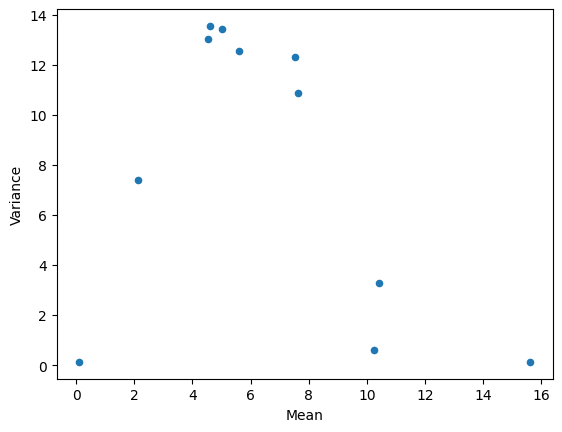

In [17]:
synth_scbool.criteria_.plot.scatter(x="Mean", y="Variance")

<Axes: xlabel='Mean', ylabel='DropOutRate'>

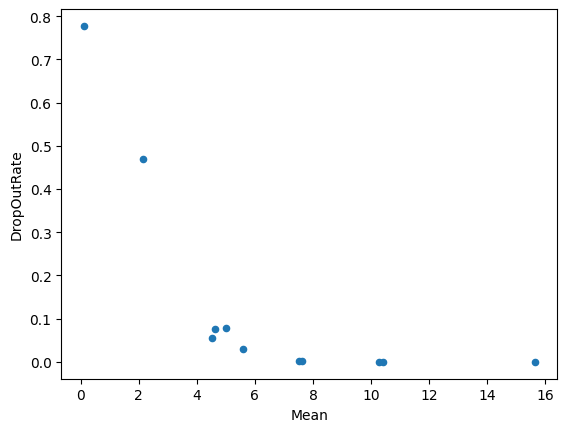

In [18]:
synth_scbool.criteria_.plot.scatter(x="Mean", y="DropOutRate")

In [19]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.pipeline import Pipeline, FunctionTransformer
from sklearn.manifold import LocallyLinearEmbedding, SpectralEmbedding

In [20]:
def rename_columns(df):
    """ """
    df.columns = [f"dim{i}" for i in range(df.shape[1])]
    return df

vis_pipeline = Pipeline([
    ('pca', PCA()),
    ('subset_pca', FunctionTransformer(lambda x: x.iloc[:, :4])),
    ('lle', LocallyLinearEmbedding(n_neighbors=300, n_components=2, random_state=SEED)),
    ('rename_cols', FunctionTransformer(rename_columns))
])

In [21]:
%time _pre_vis = vis_pipeline.fit_transform(synth_pseudocounts)

CPU times: user 21.5 s, sys: 59.1 s, total: 1min 20s
Wall time: 5.51 s


In [22]:
random_walk_df

,tf,gene1,gene2,gene3,gene4,gene5,gene6,gene7,gene8,gene9,gene10
0,1,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,1,0,0
2,1,1,0,0,0,0,0,0,1,0,0
3,1,1,0,1,0,0,0,0,1,0,0
4,1,1,0,1,0,0,1,0,1,0,0
5,1,1,0,1,0,0,1,0,1,1,0
6,1,1,0,1,0,0,1,0,1,1,1
7,1,1,0,1,1,0,1,0,1,1,1
8,1,1,1,1,1,0,1,0,1,1,1
9,1,1,1,1,1,0,1,1,1,1,1


In [23]:
import matplotlib as mpl
def colorFader(c1, c2, mix=0):
    """fade (linear interpolate) from color c1 (at mix=0) to c2 (mix=1)
    taken from:
    https://stackoverflow.com/questions/25668828/how-to-create-colour-gradient-in-python
    """
    c1 = np.array(mpl.colors.to_rgb(c1))
    c2 = np.array(mpl.colors.to_rgb(c2))
    return mpl.colors.to_hex((1 - mix) * c1 + mix * c2) 


In [24]:
n_active_genes = random_walk_df.sum(axis=1)
n_active_genes.name = "n_active_genes"
vis_frame = _pre_vis.join(n_active_genes)
vis_frame.index.name = "index"
vis_frame = vis_frame.reset_index().drop("index", axis="columns")
vis_frame.head()

,dim0,dim1,n_active_genes
0,-0.022211,-0.019980,1
1,-0.026448,-0.009560,1
2,-0.020374,-0.018226,1
3,-0.025110,-0.021894,1
4,-0.023226,-0.013966,1


In [25]:
levels = vis_frame.n_active_genes
norm_levels = levels / levels.max()
print(norm_levels.shape)
norm_levels.unique()

(2200,)


array([0.09090909, 0.18181818, 0.27272727, 0.36363636, 0.45454545,
       0.54545455, 0.63636364, 0.72727273, 0.81818182, 0.90909091,
       1.        ])

In [26]:
color = norm_levels.apply(lambda x: colorFader("darkblue", "lightgreen", x))
color.name = "color"
vis_frame = vis_frame.join(color)
vis_frame

,dim0,dim1,n_active_genes,color
0,-0.022211,-0.019980,1,#0d168b
1,-0.026448,-0.009560,1,#0d168b
2,-0.020374,-0.018226,1,#0d168b
3,-0.025110,-0.021894,1,#0d168b
4,-0.023226,-0.013966,1,#0d168b
...,...,...,...,...
2195,0.025303,-0.033900,11,#90ee90
2196,0.026706,-0.021673,11,#90ee90
2197,0.027313,-0.007632,11,#90ee90
2198,0.023092,-0.024051,11,#90ee90


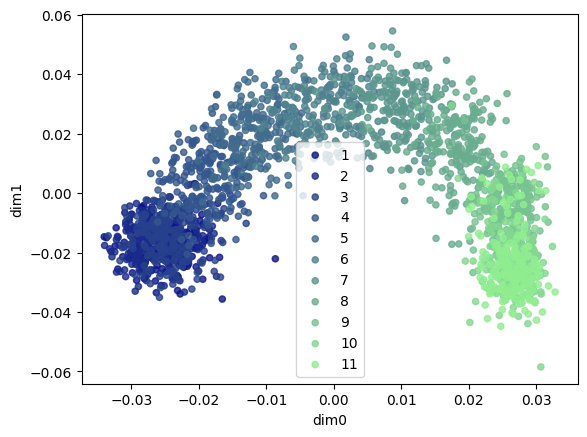

In [27]:
ax = None
for label, frame in vis_frame.groupby('n_active_genes'):
    scatter_kwargs = dict(x='dim0', y='dim1', label=label, c=frame['color'], alpha=.8)
    if ax is not None:
        scatter_kwargs.update({'ax': ax})
    ax = frame.plot.scatter(**scatter_kwargs)
